In [1]:
import cv2
import matplotlib.pyplot as plt

### 학습내용
- 이미지 읽기
- 색상 변환
- gray 이미지, 이진 이미지 변환
- 동영상 읽기
- 동영상 저장
- 동영상에서 이미지 한장 저장
- 플라스크 서버로 카메라 연동

### 이미지 읽기

- cv2.imread("이미지파일명", 옵션)
- 옵션 : cv2.IMREAD_COLOR (칼라), cv2.IMREAD_GREAYSCALE (흑백)

In [2]:
img =cv2.imread("./img/file.PNG", cv2.IMREAD_COLOR)

# 이미지출력 (새창을 띄워서 출력)
# (타이틀, 이미지객체)
cv2.imshow("image", img)

# 키 입력 대기시간을 설정
# 0 : 키 입력을 할동안 무한정 대기
cv2.waitKey(0)

# 키를 입력하면 창 닫기
cv2.destroyAllWindows()

### Matplotlib 를 이용해서 출력

In [ ]:
img2 = cv2.imread("./img/file.PNG", cv2.IMREAD_COLOR)

plt.imshow(img2)

- OpenCV 는 BGR 색상을 사용하는데 matplotlib 는 RGB를 사용
   - 빨강색 -> 파란색, 파란색 -> 빨강색으로 변경되어 출력

### 색상변환
- cv2.cvtColor()  함수 사용

In [ ]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.title("Image")
plt.imshow(img3)

### 색상 공간

- RGB 색상공간을 주로 사용
   - 채도나 명도에 민감 -> 색상 변경 -> 색상으리 변환해서 주로 사용 
      - 흑백 이미지 (gray) - RGB 색상을 0-255 숫자로 구성된 한 장의 이미지로 변환
          - 용량 감소, 처리속도가 빨라짐
      - 이진 이미지 (binary) - gray 색상화 0과 255(1)로 구성된 이미지로 변환
      - 색상공간 변환 - HSV (H - 색상, S - 채도, V - 명도)
      
      

### 흑백 이미지로 변환
- imread() 함수에서 흑백이미지로 변환해서 읽는 방법
- 칼라로 읽은 후에 cvtColor() 함수로 흑백이미지로 변환하는 방법
  - 출력할 때 칼라이미지가 필요한 경우

#### imread() 함수에서 흑백이미지로 변환해서 읽는 방법

In [ ]:
img = cv2.imread("./img/file.png", cv2.IMREAD_GRAYSCALE)

plt.xticks([])
plt.yticks([])
plt.title("gray image")

# 기본적으로 imshow의 출력색상공간이 gray가 아니기때문에 다르게 출력
plt.imshow(img)

In [ ]:
img = cv2.imread("./img/file.png", cv2.IMREAD_GRAYSCALE)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([])
plt.yticks([])
plt.title("gray image")
plt.imshow(img, cmap='gray')

- cvtColor() 함수를 이용해서 변환하는 방법

In [ ]:
img = cv2.imread("./img/file.png", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.xticks([])
plt.yticks([])
plt.title("gray image")
plt.imshow(img_gray, cmap='gray')

### 이진 이미지로 변환
- 필터링, 마스크 이미지
- cv2.threshold(이미지, 기준값 - 할당값, 옵션)
  - 기준값 : 해당값 이상이면 할당값으로 변환하고 그렇지 않으면 0으로 설정
    - 옵션에 따라 달라짐
  - 반환값이 버전마다 2개인 경우와 3개인 경우   

In [ ]:
img = cv2.imread("./img/file.png", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진 이미지로 변환
# 픽셀값이 127보다 작으면 검정색(0) 크면 흰색(255)로 변환
# 127(기준값 예시) -> 기준값 정하기 어려움 / 지동설정이 필요함
_, img_th = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.xticks([])
plt.yticks([])
plt.title("gray image")
plt.imshow(img_th, cmap='gray')

- 이미지가 다른데 같은 기준값을 쓸 수 없자나요? !!
- 자동으로 기준값을 설정 - OTSU 알고리즘, 적응형 tresholding 방법 등을 사용

In [ ]:
# OTSU 알고리즘을 이용한 기준값 설정
# 기준값을 -1로 설정
# t : 자동으로 생성된 기준값
t, th_img2 = cv2.threshold(img_gray, -1, 255, 
                           cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.xticks([])
plt.yticks([])
plt.title("%d"%t)
plt.imshow(img_th, cmap='gray')

### 동영상 읽기

- 동영상 파일에서 읽기
- PC에 연결된 카메라로부터 영상을 읽기
- 원격의 웹 카메라로부터 영상을 읽기
- 원격의 동영상 파일에서 읽기 (유투브)

- cv2.VideoCapture() : 동영상 캡처
  - 동영상 파일명 : 파일로 부터 영상을 캡처
  - 카메라 번호 (0부터 시작) : 카메라로부터 영상을 캡처
  - IP와 카메라 번호 : 원격의 웹 카메라로부터 영상을 캡처
  - URL : 원격의 동영상으로부터 영상을 캡처

In [ ]:
cap = cv2.VideoCapture("./img/video.mp4")
# cap = cv2.VideoCapture(0)  -> 카메라 번호인경우 ()안에 카메라 번호 입력 
# 웹캠인경우 (프로토콜종류: IP/카메라번호)
# cap = cv2.VideoCapture("rtsp:127.0.0.1/0")

# 캡처된 영상에서 이미지 프레임을 읽어와서 출력 (플레이어)
while True :
    # 이미지 프레임 읽기 - ret : 읽기성공여부(True 혹은 False)
    # cap.read() : 읽은 프레임 이미지
    ret, frame = cap.read()
    
    # 이미지를 못 읽었거나 다 읽은 경우 처리
    if not ret :
        print("이미지를 못 읽었거나 다 읽음")
        cap.release() # 비디오 객체 해제
        cv2.destroyAllWindows() # 창 닫기
        break
    
    # 플레이
    cv2.imshow("video", frame)
    
    # 키 입력
    # 33인 이유 : 동영상은 1초당 30장으로 구성 (0.033초의 달레아팔요)
    k = cv2.waitKey(33) 
    
    if k == 49 : # 49 = 숫자 1 (아스키코드)
        cap.release() # 비디오 객체 해제
        cv2.destroyAllWindows() # 창 닫기
        break

## CCTV 만들기( 동영상 녹화하기)

In [ ]:
cap = cv2.VideoCapture('./img/video.mp4')

# 녹화 설정 (속도, 크기, 코덱)
# 속도 (초당 몇장의 이미지를 저장할것인가?)
fps = 30.0

# 화면크기
width = int(cap.get(3))  # 영상의 가로 크기를 가져온다
height = int(cap.get(4))  # 영상의 세로 크기를 가져온다

# 코덱
codec = cv2.VideoWriter_fourcc(*"DIVX")  # avi파일로 저장하는 형태

# 설정한 값으로 저장할 동영상에 적용
# cv2.VideoWriter(파일명, 코덱, 속도, 크기)
out_file = cv2.VideoWriter('./img/cctv01.avi', codec, fps, (width, height))

print("녹화시작")

# 녹화 시작을 위한 변수
record = False  # 바로 녹화되지 않기위해 하나의 변수 선언

while True :
    ret, frame = cap.read()
    
    if not ret :
        print("프레임 이미지 읽기 실패")
        cap.release()
        out_file.release() # 파일객체 닫기
        cv2.destroyAllWindows()
        break
      
    cv2.imshow('cctv', frame)
    
    # record = True 일 경우 녹화
    if record :
        out_file.write(frame)
        
    k = cv2.waitKey(33) 
    
    if k == 50 :  # 녹화 버튼 (숫자 2 키)
        record = True
        
    if k == 49 :
        print("녹화종료")
        cap.release()
        out_file.release() 
        cv2.destroyAllWindows()
        break

### 플라스크 (Flask)를 이용해서 웹에서 카메라 연동
- Flask : 파이썬으로 된 웹 프레임워크, Django의 축소버전 -> bottle(Flask와 유사)

In [ ]:
!pip install flask

### 웹 상에 출력할 파이썬 코드를 구현(함수)

In [ ]:
import cv2 

cap = cv2.VideoCapture("./img/video.mp4")

def gen_frames() :
    while True :
        ret, frame = cap.read()
        
        # 만약 이미지를 가져오지 못했다면 다음 프레임으로 넘어감
        if not ret :
            continue
            
        else : 
            # 웹에 출력할 수 있는 형태로 변환
            # 가져온 이미지 프레임을 JPG로 변환
            ret, buffer = cv2.imencode('.jpg', frame)
            frame = buffer.tobytes()
            
            # 웹 페이지에 이미지를 
            # yield() : return 과 유사하지만 값만 넘기고 함수를 그대로 실행
            # b : 바이트 형태
            # Content-Type: image/jpeg : 전송하는 데이터가 image 데이터이고
            #                            JPG파일이라는 것을 알려줌 
            yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

### 플라스크 웹서버에서 보낸 파일을 받는 페이지

- html파일 등의 형태로 만듬

In [ ]:
"""
<html>
<body>
<div class="container">
    <div class="row">
        <div class="col-lg-8  offset-lg-2">
            <h3 class="mt-5">Live Streaming</h3>
            <img src="{{ url_for('video_feed') }}" width="50%">
        </div>
    </div>
</div>
</body>
</html>
"""

### 플라스크 웹 서버 설정


In [ ]:
from flask import Flask, render_template, Response

# 초기화
app = Flask(__name__)

# ip와 포트 바로 접근하는 함수
@app.route("/")
def index() :
    # render_template() : HTML 문서를 반환할 때 사용
    return render_template("index.html")

@app.route("/video_feed")
def video_feed() :
    # Response : 함수를 실행한 후에 반환값을 전송
    # mimetype : 다른 웹서버로 전송할 데이터의 타입
    # multipart : 복합문서 (파일, 영상, 소리)
    # x-mixed-replace : 추가적인 형식 - 뒤에 오는 형식
    # boundary : 값들의 구분자
    # frame : 영상은 프레임으로 구분
    return Response(gen_frames(), 
                    mimetype="multipart/x-mixed-replace; boundary=frame")

# 플라스크 웹 서버 구동
if __name__ == "__main__" :
    app.run(host="127.0.0.1")

## 학습내용

- ROI 검출
- 색상 추적
- 원근 보정
- YoloV3로 객체 탐지
- 얼굴 검출 방법
- 얼굴 인식 
- OCR

### ROI 검출
- ROI (Region of Image) : 이미지에 필요한 (관심) 영역을 검출하는 것

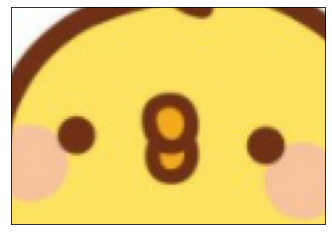

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./img/file.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ROI 영역을 자름  왼쪽 상단 - 350 310 / 오른쪽 하단 - 470 393
# 좌표(가로(x),세로(y)) / 배열(세로(행), 가로(열))

sub_img = img[310:393, 350:470]

plt.xticks([]), plt.yticks([])
#plt.imshow(img)
plt.imshow(sub_img)

## ROI 영역 표시
- cv2.rectangle() : 사각형을 그리는 함수
  - 이미지, 좌상단좌표, 우하단좌표, 색상, 선두께
  
- cv2.putText() : 텍스트를 출력하는 함수
  - 이미지, 출력내용, 출력시작좌표, 폰트, 폰트크기, 색상, 폰트의 선 굵기

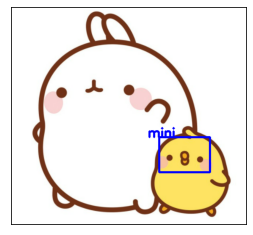

In [15]:
img2 = cv2.rectangle(img, (350,310), (470,393),(0,0,255),3)
img3 = cv2.putText(img, "mini", (323,310), cv2.FONT_HERSHEY_SIMPLEX,
                  1, (0,0,255),4)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

### 한글출력
- 사용할 폰트를 가져온다
- 가져온 폰트를 이미지 형태로 변환
- 이미지를 파이썬에서 사용할 수 있는 형태로 변환
- 이미지에 폰트를 출력
- 폰트가 출력된 이미지를 넘파이 배열로 변환해서 출력

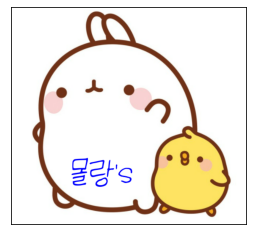

In [14]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./img/file.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 폰트 가져오기 (폰트종류, 폰트크기)
font = ImageFont.truetype("나눔손글씨 고딕 아니고 고딩.TTF", 80)

# 이미지를 PIL 이미지로 변환
img4 = Image.fromarray(img)
draw = ImageDraw.Draw(img4)

# 문자출력 (시작좌표, 출력내용, 폰트, 색상(RGBA))
draw.text((141,343), "몰랑's", font=font, fill=(0,0,255,0))

# 배열로 변환
img5 = np.array(img4)

plt.xticks([]), plt.yticks([])
plt.imshow(img5)

### 색상 추적하기
- RGB 색상은 명도와 채도에 따라 변경되는 문제
- HSV로 변화해서 사용 (H(색상)/S(채도)/V(명도))


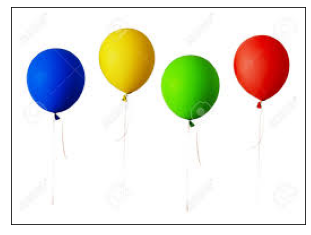

In [17]:
img = cv2.imread("./img/balloon.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

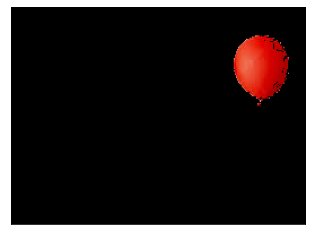

In [20]:
# RBG -> HSV로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 색의 범위 설정 : 색상,채도,명도
#빨강
lower = np.array([-10, 100, 100])
upper = np.array([10, 255, 255])

# hsv 색상공간에서 필요한 부분을 잘라냄(파이)
mask = cv2.inRange(hsv, lower, upper)

# 잘라낸 hsv 색상에 포함된 색만 이미지에서 추출
img2 = cv2.bitwise_and(img, img, mask=mask)

plt.xticks([]), plt.yticks([])
plt.imshow(img2)

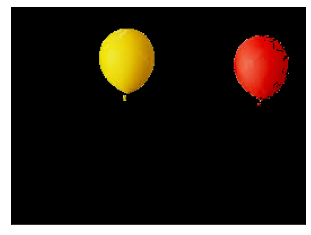

In [31]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#빨강
lower = np.array([-40, 100, 100])
upper = np.array([40, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

img3 = cv2.bitwise_and(img, img, mask=mask)

plt.xticks([]), plt.yticks([])
plt.imshow(img3)

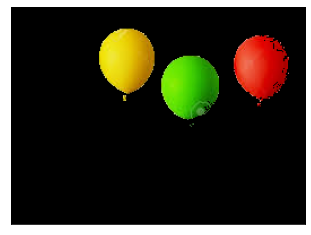

In [32]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#빨강
lower = np.array([-90, 100, 100])
upper = np.array([90, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

img4 = cv2.bitwise_and(img, img, mask=mask)

plt.xticks([]), plt.yticks([])
plt.imshow(img4)

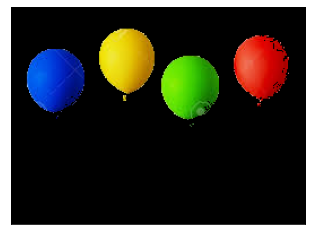

In [33]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#빨강
lower = np.array([-135, 100, 100])
upper = np.array([135, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

img5 = cv2.bitwise_and(img, img, mask=mask)

plt.xticks([]), plt.yticks([])
plt.imshow(img5)

### 원근보정
- 이미지가 비틀려있는 경우 보정

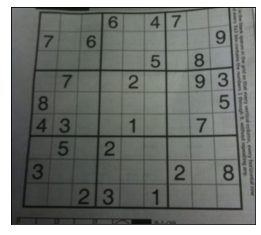

In [35]:
img = cv2.imread("./img/hough.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

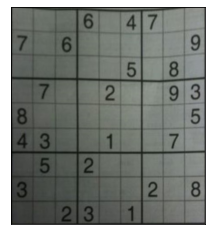

In [40]:
# 원본 이미지의 크기
w, h, channel = img.shape

# 보정 전의 우치 (각 모서리의 좌표)
pts1 = np.float32([[64,14],[478,2],[27,438],[506,446]])

# 보정 후의 위치
pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])

# 보정 설정 (투영)
M = cv2.getPerspectiveTransform(pts1, pts2)

# 보정 실행 (이미지, 투영조건, 이미지 크기)
img2 = cv2.warpPerspective(img, M, (w,h))

plt.xticks([]), plt.yticks([])
plt.imshow(img2)

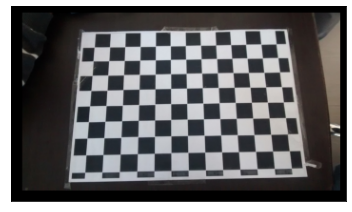

In [41]:
img = cv2.imread("./img/hough2.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

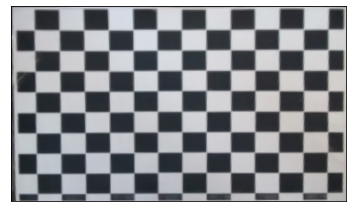

In [46]:
# 원본 이미지의 크기
h, w, channel = img.shape

# 보정 전의 우치 (각 모서리의 좌표)
pts1 = np.float32([[74,27],[288,24],[57,182],[310,178]])

# 보정 후의 위치
pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])

# 보정 설정 (투영)
M = cv2.getPerspectiveTransform(pts1, pts2)

# 보정 실행 (이미지, 투영조건, 이미지 크기)
img2 = cv2.warpPerspective(img, M, (w,h))

plt.xticks([]), plt.yticks([])
plt.imshow(img2)

### YoloV3 를 이용한 객체 탐지

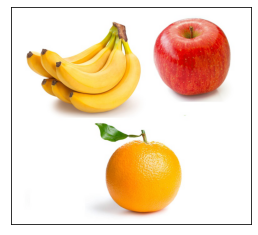

In [52]:
img = cv2.imread("./img/fruit.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

In [49]:
!pip install cvlib

     --------------------------------------- 13.1/13.1 MB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046371 sha256=6b37c6b053a065453c5d6f370a3d8f47c81f9609e5adc806173d0310d903d52c
  Stored in directory: c:\users\smt107\appdata\local\pip\cache\wheels\bb\11\55\82ced947752cc4056335a4ee9c304a93d43ce857230538f0ae
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=543059ef4802d14ac349e9de34244dfb7a3cb879e9600f69ab9dfa7da1f23b8c
  Stored in directory: c:\users\smt107\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
  Created wheel for progressbar: filename=progressb

You should consider upgrading via the 'c:\users\smt107\anaconda3\python.exe -m pip install --upgrade pip' command.


In [54]:
from cvlib.object_detection import draw_bbox
import cvlib as cv

# 객체 추출 (이미지, 정확도, 사용할 모델)
# 반환값 : 박스위치, 라벨값, 정확도 (유사도)
bbox, label, conf = cv.detect_common_objects(img,
                                             confidence=0.9,
                                             model="yolov3")

# 이미지 정보를 출력 (라벨, 박스)
img2 = draw_bbox(img, bbox, label, conf)

plt.xticks([]), plt.yticks([])
plt.imshow(img2)

TypeError: only integer scalar arrays can be converted to a scalar index